In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from utils import prepare, prepare_lstm
from models.lstm import build_model_lstm, cv_model_lstm
from models.bilstm import cv_model_bilstm
from models.lstm2 import cv_model_lstm2
from models.bilstm2 import cv_model_bilstm2
from models.lstm3 import cv_model_lstm3
from models.attention_lstm import cv_model_attention_lstm

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

In [2]:
X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler = prepare()

X_train_scaled_60d, y_train_scaled_shifted = prepare_lstm(X_train_scaled, y_train_scaled)
X_test_scaled_60d, y_test_scaled_shifted = prepare_lstm(X_test_scaled, y_test_scaled)

In [3]:
pickle.dump(X_scaler, open("artifacts/x_scaler.pkl", "wb"))
pickle.dump(y_scaler, open("artifacts/y_scaler.pkl", "wb"))

In [4]:
print(X_train_scaled.shape)
print(y_train_scaled.shape)

print(X_test_scaled.shape)
print(y_test_scaled.shape)
print()

print(X_train_scaled_60d.shape)
print(y_train_scaled_shifted.shape)

print(X_test_scaled_60d.shape)
print(y_test_scaled_shifted.shape)

(1957, 4)
(1957, 1)
(490, 4)
(490, 1)

(1897, 60, 4)
(1897, 1)
(430, 60, 4)
(430, 1)


In [5]:
# cv_model_lstm(X_train_scaled_60d, y_train_scaled_shifted)

In [6]:
# cv_model_bilstm(X_train_scaled_60d, y_train_scaled_shifted)

In [7]:
# cv_model_lstm2(X_train_scaled_60d, y_train_scaled_shifted)

In [8]:
# cv_model_bilstm2(X_train_scaled_60d, y_train_scaled_shifted)

In [9]:
# cv_model_lstm3(X_train_scaled_60d, y_train_scaled_shifted)

In [10]:
# val_loss - 0.3 - 0.5
# cv_model_attention_lstm(X_train_scaled_60d, y_train_scaled_shifted)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(
  X_train_scaled_60d,
  y_train_scaled_shifted,
  shuffle=False,
  test_size=0.2
)

In [12]:
es = EarlyStopping(monitor="val_loss", patience=25)
mc = ModelCheckpoint('artifacts/best_lstm_64.h5', monitor='val_loss', save_best_only=True)

model = build_model_lstm(64)

# model.fit(
#   X_train,
#   y_train,
#   validation_data=(X_val, y_val),
#   epochs=10000,
#   batch_size=32,
#   callbacks=[es, mc]
# )

In [13]:
model = keras.models.load_model("artifacts/best_lstm_64.h5")

print("Val Loss:", model.evaluate(X_val, y_val))
print("Test Loss:", model.evaluate(X_test_scaled_60d, y_test_scaled_shifted))

12/12 [==============================] - 1s 14ms/step - loss: 0.0880
Val Loss: 0.08801396191120148
14/14 [==============================] - 0s 8ms/step - loss: 0.0523
Test Loss: 0.05233778804540634


In [14]:
y_pred_lstm_64 = model.predict(X_test_scaled_60d)
y_pred_lstm_64_inv = y_scaler.inverse_transform(y_pred_lstm_64)

y_test_scaled_shifted_inv = y_scaler.inverse_transform(y_test_scaled_shifted)

print("MAE:", mean_absolute_error(y_pred_lstm_64_inv, y_test_scaled_shifted_inv))
print("MAPE:", mean_absolute_percentage_error(y_pred_lstm_64_inv, y_test_scaled_shifted_inv))
print("MSE:", mean_squared_error(y_pred_lstm_64_inv, y_test_scaled_shifted_inv))
print("RMSE:", np.sqrt(mean_squared_error(y_pred_lstm_64_inv, y_test_scaled_shifted_inv)))
print("R2:", r2_score(y_pred_lstm_64_inv, y_test_scaled_shifted_inv))

14/14 [==============================] - 0s 7ms/step
MAE: 20.27350449672966
MAPE: 0.013422533535139943
MSE: 671.2094416147751
RMSE: 25.907710080491
R2: 0.7230475397984523


In [15]:
es = EarlyStopping(monitor="val_loss", patience=25)
mc = ModelCheckpoint('artifacts/best_lstm_256.h5', monitor='val_loss', save_best_only=True)

model = build_model_lstm(256)

# model.fit(
#   X_train,
#   y_train,
#   validation_data=(X_val, y_val),
#   epochs=10000,
#   batch_size=32,
#   callbacks=[es, mc]
# )

In [16]:
model = keras.models.load_model("artifacts/best_lstm_256.h5")

print("Val Loss:", model.evaluate(X_val, y_val))
print("Test Loss:", model.evaluate(X_test_scaled_60d, y_test_scaled_shifted))

12/12 [==============================] - 1s 42ms/step - loss: 0.0863
Val Loss: 0.08631757646799088
14/14 [==============================] - 1s 38ms/step - loss: 0.0613
Test Loss: 0.06130385398864746


In [17]:
y_pred_lstm_256 = model.predict(X_test_scaled_60d)
y_pred_lstm_256_inv = y_scaler.inverse_transform(y_pred_lstm_256)

y_test_scaled_shifted_inv = y_scaler.inverse_transform(y_test_scaled_shifted)

print("MAE:", mean_absolute_error(y_pred_lstm_256_inv, y_test_scaled_shifted_inv))
print("MAPE:", mean_absolute_percentage_error(y_pred_lstm_256_inv, y_test_scaled_shifted_inv))
print("MSE:", mean_squared_error(y_pred_lstm_256_inv, y_test_scaled_shifted_inv))
print("RMSE:", np.sqrt(mean_squared_error(y_pred_lstm_256_inv, y_test_scaled_shifted_inv)))
print("R2:", r2_score(y_pred_lstm_256_inv, y_test_scaled_shifted_inv))

14/14 [==============================] - 1s 40ms/step
MAE: 22.793491665152626
MAPE: 0.015063636779073415
MSE: 786.195104887181
RMSE: 28.039170902278492
R2: 0.6618539821478379


In [18]:
df = pd.read_csv("klse.csv")

df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

df.drop("2023-04-20", axis=0, inplace=True)

df.drop("Dividends", axis=1, inplace=True)
df.drop("Stock Splits", axis=1, inplace=True)

In [19]:
train_test_point = int(len(df) * 0.8)

df2 = pd.DataFrame(
  {
    "y_pred_64": y_pred_lstm_64_inv.flatten(),
    "y_pred_256": y_pred_lstm_256_inv.flatten()
  },
  index=df.index[train_test_point + 60:]
)

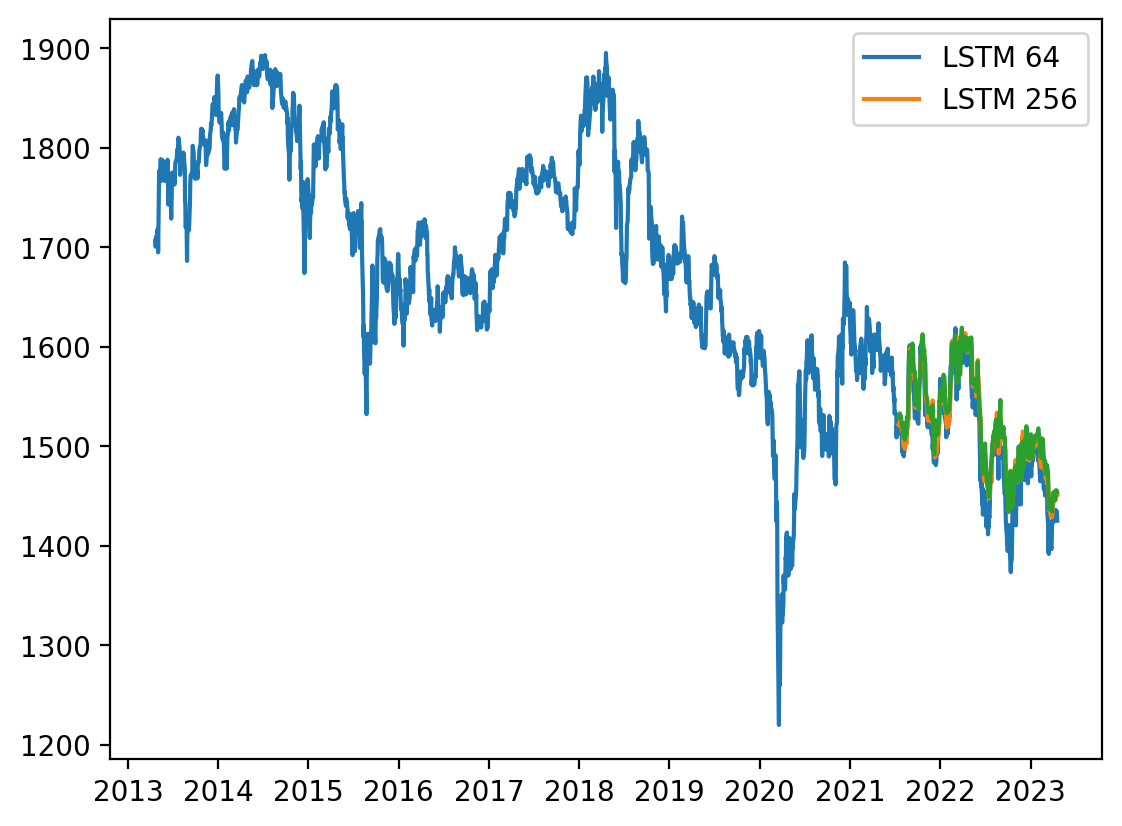

In [20]:
plt.plot(df["Close"])
plt.plot(df2["y_pred_64"])
plt.plot(df2["y_pred_256"])

plt.legend(["LSTM 64", "LSTM 256"])

plt.show()